In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
titanic=pd.read_csv("C:/Users/Affinity/Downloads/titanic.csv")

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic.info() #데이터 각각 컬럼의 개수, null인지, 타입이 뭔지 알 수 있음
#cabin컬럼에 null값이 있음, Pclass, Survived 들은 수치가 아닌 명목이기 때문에 형변환 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
titanic["Pclass"]=titanic["Pclass"].astype(object)
titanic["Survived"]=titanic["Survived"].astype(object)

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 83.6+ KB


In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
missing_df=titanic.isnull().sum().reset_index()
missing_df.columns=['column','count']
missing_df['ratio']=missing_df['count']/titanic.shape[0]
missing_df.loc[missing_df['ratio']!=0]

,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


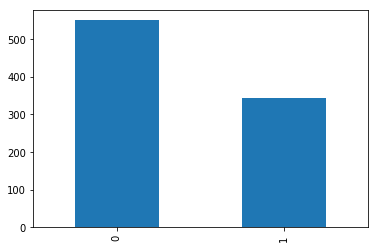

In [18]:
#종속변수 분포 확인
titanic['Survived'].value_counts().plot(kind='bar')
plt.show()

In [19]:
#독립변수 - 명목형 변수 분포확인
#object 칼럼만

category_feature=[col for col in titanic.columns if
                  titanic[col].dtypes=="object"]
category_feature
    

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [28]:
category_feature=list(set(category_feature)-set(["Survived"]))
category_feature

['Embarked', 'Name', 'Sex', 'Pclass', 'Cabin', 'Ticket']

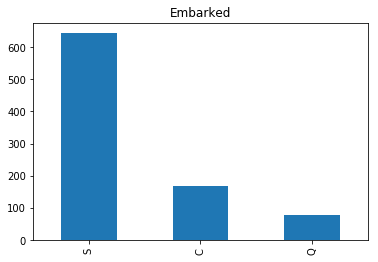

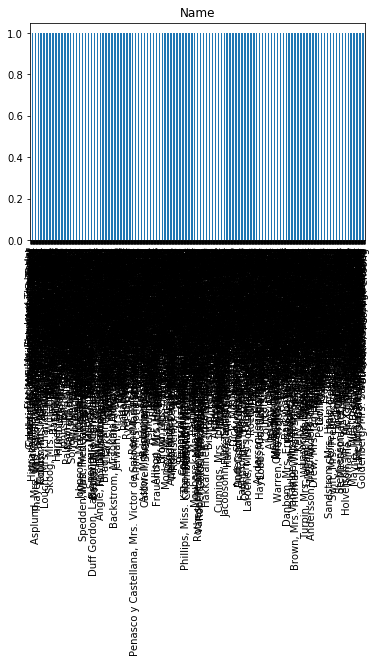

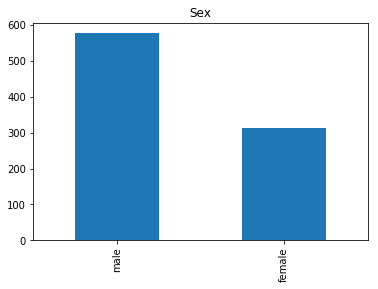

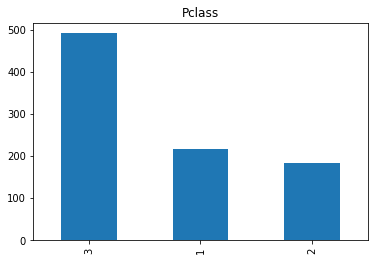

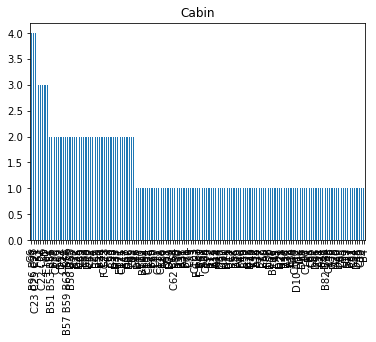

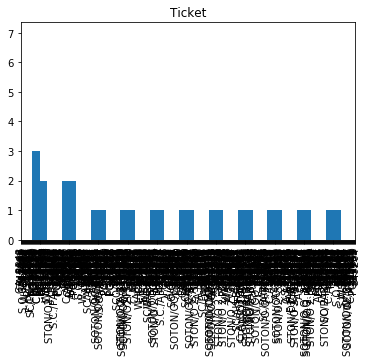

In [29]:
for col in category_feature:
    titanic[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

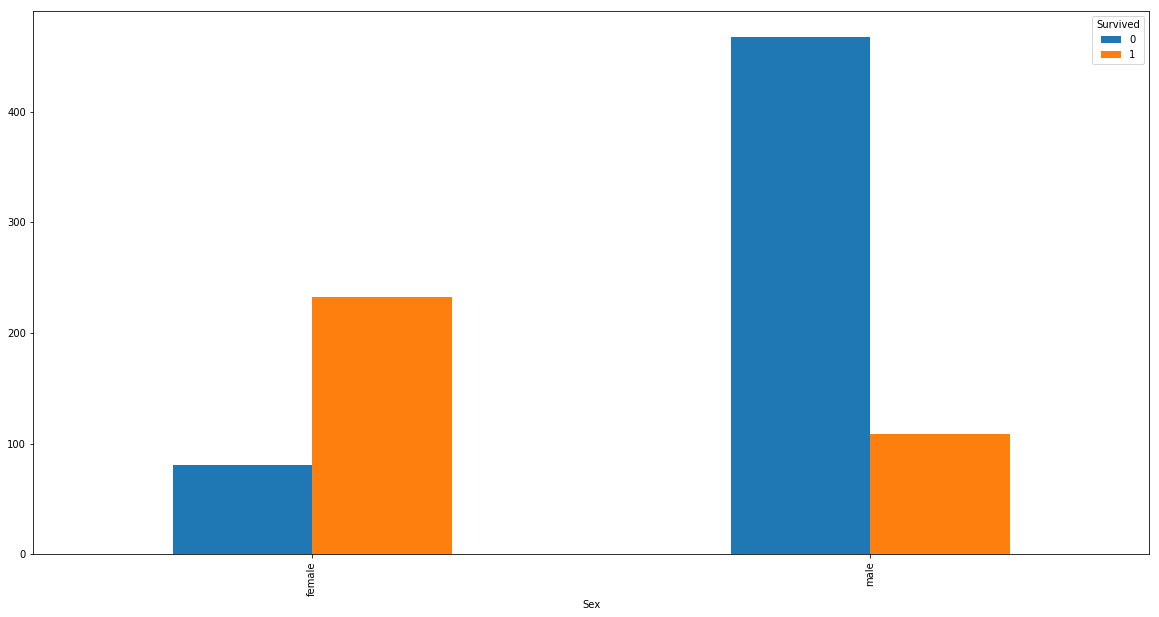

In [32]:
#관련성이 높은 두 표

sex_df=titanic.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar',figsize=(20,10))
plt.show()

In [36]:
#수치형 변수 분포확인
numerical_feature=list(set(titanic.columns)-set(category_feature)-set(['PassengerId','Survived']))
numerical_feature=np.sort(numerical_feature)
numerical_feature

array(['Age', 'Fare', 'Parch', 'SibSp'], dtype='<U5')

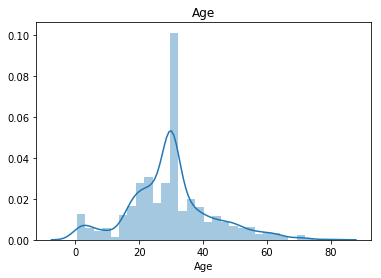

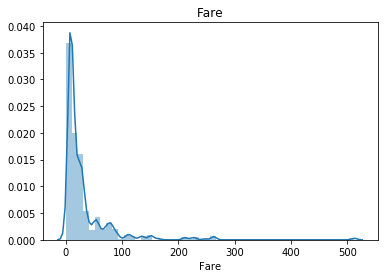

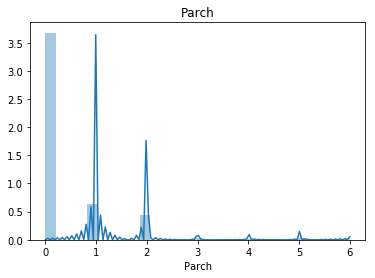

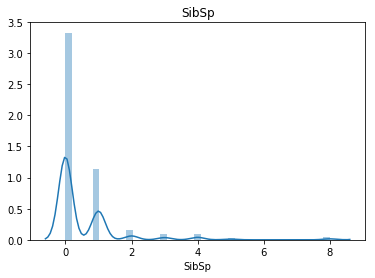

In [37]:
#단변수
for col in numerical_feature:
    sns.distplot(titanic.loc[titanic[col].notnull(),col])
    plt.title(col)
    plt.show()

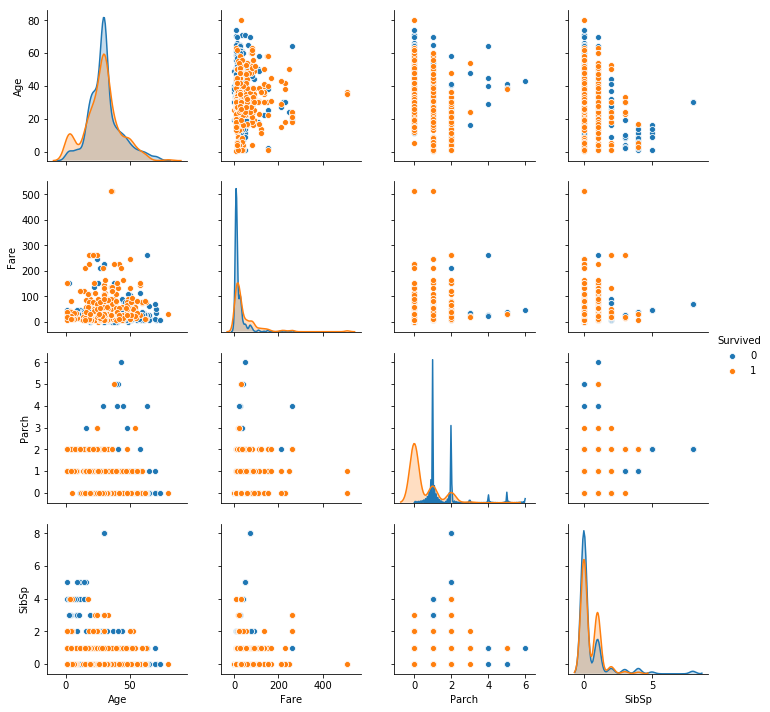

In [38]:
#다변수
sns.pairplot(titanic[list(numerical_feature)+["Survived"]],hue="Survived",
            x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()